In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.models import Sequential

In [3]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

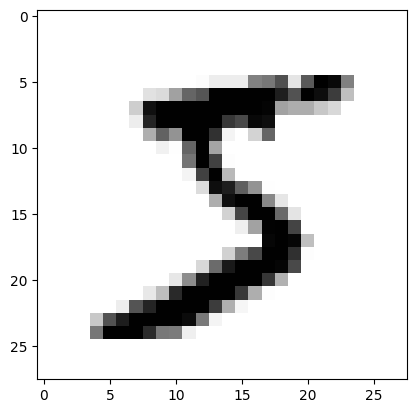

5


In [4]:
plt.imshow(train_images[0],cmap=plt.cm.binary)
plt.show()
print(train_labels[0])

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_images.shape

(60000, 28, 28)

In [6]:
import math
import cv2
import numpy as np
from scipy.ndimage.measurements import center_of_mass
import os

/var/folders/l1/vmmbdnr90zx9y6g3dvf4kh040000gn/T/ipykernel_71584/1805760282.py:4: DeprecationWarning: Please import `center_of_mass` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.measurements import center_of_mass


In [8]:
def getBestShift(img):

    cy,cx = center_of_mass(img)

    rows,cols = img.shape
    shiftx = np.round(cols/2.0-cx).astype(int)
    shifty = np.round(rows/2.0-cy).astype(int)

    return shiftx,shifty

def shift(img,sx,sy):
    rows,cols = img.shape
    M = np.float32([[1,0,sx],[0,1,sy]])
    shifted = cv2.warpAffine(img,M,(cols,rows))
    return shifted

def rec_digit(img_path):
  img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
  # применяем пороговую обработку
  (thresh, gray) = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV)

  # удаляем нулевые строки и столбцы
  while np.sum(gray[0]) == 0:
    gray = gray[1:]
  while np.sum(gray[:,0]) == 0:
    gray = np.delete(gray,0,1)
  while np.sum(gray[-1]) == 0:
    gray = gray[:-1]
  while np.sum(gray[:,-1]) == 0:
    gray = np.delete(gray,-1,1)
  rows,cols = gray.shape

  # изменяем размер, чтобы помещалось в box 20x20 пикселей
  if rows > cols:
    factor = 20.0/rows
    rows = 20
    cols = int(round(cols*factor))
    gray = cv2.resize(gray, (cols,rows))
  else:
    factor = 20.0/cols
    cols = 20
    rows = int(round(rows*factor))
    gray = cv2.resize(gray, (cols, rows))

  # расширяем до размера 28x28
  colsPadding = (int(math.ceil((28-cols)/2.0)),int(math.floor((28-cols)/2.0)))
  rowsPadding = (int(math.ceil((28-rows)/2.0)),int(math.floor((28-rows)/2.0)))
  gray = np.lib.pad(gray,(rowsPadding,colsPadding),'constant')

  # сдвигаем центр масс
  shiftx,shifty = getBestShift(gray)
  shifted = shift(gray,shiftx,shifty)
  gray = shifted

  cv2.imwrite('gray'+ img_path, gray)
  img = gray / 255.0
  img = np.array(img).reshape(-1, 28, 28)
  #out = str(np.argmax(model.predict(img)))
  return img

In [74]:
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.models import Sequential

model_1 = Sequential()
model_1.add(Flatten())
model_1.add(Dense(512, activation='relu'))
model_1.add(Dense(10, activation='softmax'))

model_1.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

model_1.fit(train_images, train_labels, epochs=20, batch_size=128)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8715 - loss: 0.4604
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9683 - loss: 0.1140
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9808 - loss: 0.0702
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9867 - loss: 0.0483
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9910 - loss: 0.0339
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9935 - loss: 0.0248
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9957 - loss: 0.0179
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9964 - loss: 0.0149
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9972 - loss: 0.0116
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9982 - loss: 0.0090
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9987 - loss: 0.0066
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step

In [75]:
test_loss_1, test_acc_1 = model_1.evaluate(test_images, test_labels)
print('test_acc_1:', test_acc_1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9778 - loss: 0.1043
test_acc_1: 0.9812999963760376


In [76]:
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.models import Sequential

model_2 = Sequential()
model_2.add(Flatten())
model_2.add(Dense(512, activation='relu'))
model_2.add(Dense(10, activation='softmax'))

model_2.compile(optimizer='adadelta',loss='categorical_crossentropy', metrics=['accuracy'])

model_2.fit(train_images, train_labels, epochs=20, batch_size=128)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.1088 - loss: 2.3450
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2288 - loss: 2.1901
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3725 - loss: 2.0453
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5118 - loss: 1.9116
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6115 - loss: 1.7858
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6736 - loss: 1.6722
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7139 - loss: 1.5631
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7435 - loss: 1.4610
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7583 - loss: 1.3729
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7725 - loss: 1.2923
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7826 - loss: 1.2172
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/ste

In [77]:
test_loss_2, test_acc_2 = model_2.evaluate(test_images, test_labels)
print('test_acc_2:', test_acc_2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.8275 - loss: 0.8216
test_acc_2: 0.853600025177002


In [78]:
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.models import Sequential

model_3 = Sequential()
model_3.add(Flatten())
model_3.add(Dense(512, activation='relu'))
model_3.add(Dense(10, activation='softmax'))

model_3.compile(optimizer='adagrad',loss='categorical_crossentropy', metrics=['accuracy'])

model_3.fit(train_images, train_labels, epochs=20, batch_size=128)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4116 - loss: 1.9659
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7911 - loss: 1.1092
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8344 - loss: 0.7950
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8550 - loss: 0.6560
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8630 - loss: 0.5816
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8715 - loss: 0.5293
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8783 - loss: 0.4910
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8864 - loss: 0.4581
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8865 - loss: 0.4419
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8920 - loss: 0.4238
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8926 - loss: 0.4112
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

In [79]:
test_loss_3, test_acc_3 = model_3.evaluate(test_images, test_labels)
print('test_acc_3:', test_acc_3)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - accuracy: 0.8973 - loss: 0.3679
test_acc_3: 0.9132000207901001


In [80]:
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.models import Sequential

model_4 = Sequential()
model_4.add(Flatten())
model_4.add(Dense(512, activation='relu'))
model_4.add(Dense(10, activation='softmax'))

model_4.compile(optimizer='SGD',loss='categorical_crossentropy', metrics=['accuracy'])

model_4.fit(train_images, train_labels, epochs=20, batch_size=128)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6012 - loss: 1.5374
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8679 - loss: 0.5630
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8870 - loss: 0.4342
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9015 - loss: 0.3714
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9063 - loss: 0.3457
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9072 - loss: 0.3311
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9151 - loss: 0.3045
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9179 - loss: 0.2926
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9204 - loss: 0.2851
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9217 - loss: 0.2806
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9276 - loss: 0.2638
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [81]:
test_loss_4, test_acc_4 = model_4.evaluate(test_images, test_labels)
print('test_acc_4:', test_acc_4)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - accuracy: 0.9332 - loss: 0.2377
test_acc_4: 0.9429000020027161


In [8]:
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.models import Sequential

model_5 = Sequential()
model_5.add(Flatten())
model_5.add(Dense(512, activation='relu'))
model_5.add(Dense(10, activation='softmax'))

model_5.compile(optimizer='RMSprop',loss='categorical_crossentropy', metrics=['accuracy'])

model_5.fit(train_images, train_labels, epochs=20, batch_size=128)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8726 - loss: 0.4401
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9664 - loss: 0.1142
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9783 - loss: 0.0709
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9850 - loss: 0.0509
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9886 - loss: 0.0369
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9917 - loss: 0.0269
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9942 - loss: 0.0210
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9959 - loss: 0.0153
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9976 - loss: 0.0103
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9982 - loss: 0.0086
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9986 - loss: 0.0065
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step

In [9]:
tsr_img = rec_digit("./images/test.jpg")
result = model_5.predict_on_batch(tsr_img)
print(np.argmax(result))


5


In [84]:
test_loss_5, test_acc_5 = model_5.evaluate(test_images, test_labels)
print('test_acc_5:', test_acc_5)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - accuracy: 0.9810 - loss: 0.0793
test_acc_5: 0.984000027179718


In [9]:
model_6 = Sequential()
model_6.add(Flatten())
model_6.add(Dense(512, activation='relu'))
model_6.add(Dense(10, activation='softmax'))

model_6.compile(optimizer='adamax',loss='categorical_crossentropy', metrics=['accuracy'])

model_6.fit(train_images, train_labels, epochs=20, batch_size=128)


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8562 - loss: 0.5573
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9437 - loss: 0.2030
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9585 - loss: 0.1474
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9666 - loss: 0.1187
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9746 - loss: 0.0930
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9794 - loss: 0.0774
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9830 - loss: 0.0656
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9849 - loss: 0.0592
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9867 - loss: 0.0502
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9891 - loss: 0.0445
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9903 - loss: 0.0416
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/ste

In [10]:
test_loss_6, test_acc_6 = model_6.evaluate(test_images, test_labels)
print('test_acc_6:', test_acc_6)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9788 - loss: 0.0723
test_acc_6: 0.9819999933242798


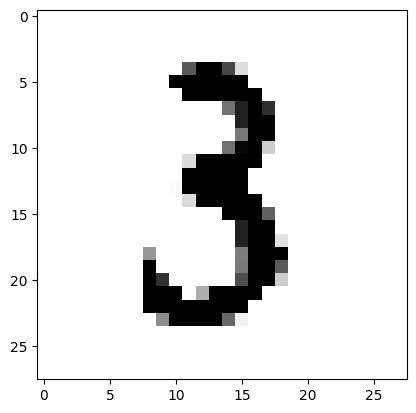

3




In [15]:
a = rec_digit('./images/test3.jpg')
plt.imshow(a.reshape(28,28),cmap=plt.cm.binary)
plt.show()
result = model_6.predict_on_batch(a)
print(np.argmax(result))
print('\n')
# for file_name in os.listdir("./images"):